# Build and Visualize a Gaussian Mixture Model (GMM)

# Key Concepts
Gaussian Mixture Model (GMM) assumes data points come from a mixture of several Gaussian distributions with unknown parameters.

Mixture Model: Data comes from multiple subpopulations (clusters), each modeled by a Gaussian distribution.

Gaussian Distribution: Each component is a multivariate normal with mean vector 
𝜇
μ and covariance matrix 
Σ
Σ.

Soft Clustering: Unlike K-Means which assigns each point hard membership to a cluster, GMM assigns probabilities (responsibilities) to each data point for each cluster.

# GMM Probability Density Function
𝑝
(
𝑥
)
=
∑
𝑖
=
1
𝐾
𝜋
𝑖
⋅
𝑁
(
𝑥
∣
𝜇
𝑖
,
Σ
𝑖
)
p(x)= 
i=1
∑
K
​
 π 
i
​
 ⋅N(x∣μ 
i
​
 ,Σ 
i
​
 )
𝐾
K = number of components

𝜋
𝑖
π 
i
​
  = mixing coefficient (prior probability), where 
∑
𝑖
=
1
𝐾
𝜋
𝑖
=
1
∑ 
i=1
K
​
 π 
i
​
 =1

𝑁
(
𝑥
∣
𝜇
𝑖
,
Σ
𝑖
)
N(x∣μ 
i
​
 ,Σ 
i
​
 ) = multivariate Gaussian PDF for component 
𝑖
i

# EM Algorithm for GMM
E-Step (Expectation)
Calculate responsibilities 
𝛾
𝑖
(
𝑥
𝑛
)
γ 
i
​
 (x 
n
​
 ), the probability that component 
𝑖
i generated data point 
𝑥
𝑛
x 
n
​
 :

𝛾
𝑖
(
𝑥
𝑛
)
=
𝜋
𝑖
𝑁
(
𝑥
𝑛
∣
𝜇
𝑖
,
Σ
𝑖
)
∑
𝑗
=
1
𝐾
𝜋
𝑗
𝑁
(
𝑥
𝑛
∣
𝜇
𝑗
,
Σ
𝑗
)
γ 
i
​
 (x 
n
​
 )= 
∑ 
j=1
K
​
 π 
j
​
 N(x 
n
​
 ∣μ 
j
​
 ,Σ 
j
​
 )
π 
i
​
 N(x 
n
​
 ∣μ 
i
​
 ,Σ 
i
​
 )
​
 
M-Step (Maximization)
Update parameters based on responsibilities:

New mean:

𝜇
𝑖
=
∑
𝑛
𝛾
𝑖
(
𝑥
𝑛
)
𝑥
𝑛
∑
𝑛
𝛾
𝑖
(
𝑥
𝑛
)
μ 
i
​
 = 
∑ 
n
​
 γ 
i
​
 (x 
n
​
 )
∑ 
n
​
 γ 
i
​
 (x 
n
​
 )x 
n
​
 
​
New covariance:

Σ
𝑖
=
∑
𝑛
𝛾
𝑖
(
𝑥
𝑛
)
(
𝑥
𝑛
−
𝜇
𝑖
)
(
𝑥
𝑛
−
𝜇
𝑖
)
𝑇
∑
𝑛
𝛾
𝑖
(
𝑥
𝑛
)
Σ 
i
​
 = 
∑ 
n
​
 γ 
i
​
 (x 
n
​
 )
∑ 
n
​
 γ 
i
​
 (x 
n
​
 )(x 
n
​
 −μ 
i
​
 )(x 
n
​
 −μ 
i
​
 ) 
T
 
​
New mixing coefficient:

𝜋
𝑖
=
1
𝑁
∑
𝑛
𝛾
𝑖
(
𝑥
𝑛
)
π 
i
​
 = 
N
1
​
  
n
∑
​
 γ 
i
​
 (x 
n
​
 )
Repeat E-step and M-step until convergence (log-likelihood changes very little).

# Implementation

Converged in 12 iterations.


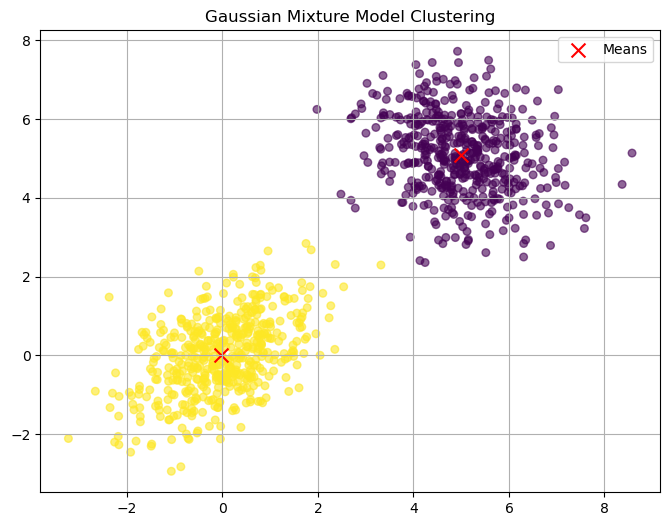

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Step 1: Generate synthetic 2D data
np.random.seed(42)
n_samples = 500

mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, n_samples)

mean2 = [5, 5]
cov2 = [[1, -0.3], [-0.3, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, n_samples)

X = np.vstack((data1, data2))  # Shape: (1000, 2)

# Step 2: Initialize GMM Parameters
k = 2  # Number of Gaussian components
n, d = X.shape

means = X[np.random.choice(n, k, replace=False)]
covariances = [np.eye(d) for _ in range(k)]
weights = np.ones(k) / k

# Step 3-4: Define EM Algorithm steps
def e_step(X, means, covariances, weights):
    responsibilities = np.zeros((n, k))
    for i in range(k):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        responsibilities[:, i] = weights[i] * rv.pdf(X)
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    return responsibilities

def m_step(X, responsibilities):
    Nk = responsibilities.sum(axis=0)
    weights = Nk / n
    means = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
    covariances = []
    for i in range(k):
        diff = X - means[i]
        cov = np.dot(responsibilities[:, i] * diff.T, diff) / Nk[i]
        covariances.append(cov)
    return weights, means, covariances

# Step 5: Run EM Algorithm
max_iters = 100
tol = 1e-4
log_likelihoods = []

for iteration in range(max_iters):
    responsibilities = e_step(X, means, covariances, weights)
    weights, means, covariances = m_step(X, responsibilities)

    # Compute log-likelihood
    ll = 0
    for i in range(k):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        ll += np.sum(np.log(weights[i] * rv.pdf(X) + 1e-8))  # Add epsilon to avoid log(0)
    log_likelihoods.append(ll)

    if iteration > 0 and abs(ll - log_likelihoods[-2]) < tol:
        print(f"Converged in {iteration + 1} iterations.")
        break
else:
    print("Reached maximum iterations.")

# Step 6: Visualize Clustering
colors = responsibilities.argmax(axis=1)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, cmap='viridis', alpha=0.6, s=30)
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Means')
plt.title("Gaussian Mixture Model Clustering")
plt.legend()
plt.grid(True)
plt.show()